<a href="https://colab.research.google.com/github/Hutaf/SDA-Machine-Learning/blob/daily.activities/genomics_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration: Linear Regression and Classification

A fundamental component of mastering data science concepts is applying and practicing them. 

This exploratory notebook is designed to provide you with a semi-directed space to do just that with the Python, linear regression, and ML-based classification skills that we are currently covering on the Learn Platform.

The specific examples in this notebook apply NumPy and Pandas concepts in a life-sciences context, but they are applicable across disciplines and industry verticals.

This notebook is divided into different stages of exploration. Initial suggestions for exploration are more structured than later ones and can provide some additional concepts and skills for tackling data-science challenges with real-world data. 

## Setup and Refresher on Notebooks

Before we begin, we should review the important the principal libraries used to explore and manipulate data in Python: NumPy, Pandas, and Scikit-learn. 

The cell below also imports Matplotlib, the main visualization library in Python. For simplicity and consistency with prior instruction, industry-standard aliases are applied to these imported libraries. 

The cell below also runs `%matplotlib inline` magic command, which instructs Jupyter to display Matplotlib output directly in the notebook. 

This cell also imports many of the specific functions from Scikit-learn that you will need, but feel free to import others as you see fit in the course of your exploration.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### Crash Course on Notebook Cells

I know that you're all very familiar with Juypter Notebooks right now, but it's always good to sharpen your basic understanding of things--especially since you might take long breaks from using some tools here and there. Take a few minutes to read through these notes and maybe you'll learn something.

Notebook cells are divided into Markdown text cells and interactive code cells. You can easily recognize code cells by the `In [ ]:` to the left of them.

Code in a code cells has only been executed -- and is thus available for use in other code cells in the notebook -- if there is a number beside the code cell (for example, `In [1]:`).

To run the code in a cell, you can click the **Run** icon at the top left of a code cell or press **`Ctrl` + `Enter`**.

Cells in Jupyter notebooks can be in one of two modes: edit or command. The active cell (the cell that you have clicked on or navigated to) is in edit mode if it has a green border around it. Code cells are in edit mode by default when you click on them. (If, however, you navigate to a code cell by other means, it will be in command mode; simply press **`Enter`** to change it to edit mode.)

An active cell with a blue border is in command mode. You can change from edit mode to command mode in a cell by pressing **`Esc`** or by running the contents of a cell. Running a Markdown cell will render the Markdown.

To add cells to a notebook, select **Insert cell** from the menu at the top of the screen or in the margin to the left of a cell in edit mode. You can delete unneeded cells by clicking the **Delete cell** icon at the top right of the cell.

Entering command mode enables you to use keyboard shortcuts to quickly work with your notebook. Here are some of the most useful ones:
 - Add cell above: **`A`**
 - Add cell below: **`B`**
 - Delete cell: **`D`**,**`D`** (press **`D`** twice)

Cheatography has a good compendium of additional keyboard shortcuts [here](https://cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/).

You can run code cells from edit mode or command mode.

### Stop and check

Open-ended questions are for you to discuss in your breakout groups. When you come back to the main session, we'll talk about those questions and move forward. I've added some hints here and there for you.

### Documentation and Help

Documentation for Python objects and functions is available directly in Jupyter notebooks. In order to access the documentation, simply put a question mark in front of the object or function in a code cell and execute the cell (for example, `?print`). A window containing the documentation will then open at the bottom of the notebook.

On to exploration!

## Section 1: Guided Exploration

For the first part of this morning's activity, you will step into the role of a data scientist examining some raw biological statistics. The dataset provided is in the `mammals.csv` file, which documents the body weight (in kilograms) and the brain weight (in grams) of 62 mammals.  

(Source: Rogel-Salazar, Jesus (2015): Mammals Dataset. figshare. Dataset. https://doi.org/10.6084/m9.figshare.1565651.v1. Drawn from Allison, T. and Cicchetti, D. V. (1976). Sleep in mammals: ecological and constitutional correlates. *Science, 194*, 732–734.)

Specifically, your task is to evaluate the relationship between mammalian body weight and brain weight. Even without domain expertise, it seems logical that some relationship should exist (afterall, it seems safe to assume that larger animals would have proporitionally larger brains). 

But what is the exact relationship? Any strong is that relationship. Determining those details is useful in fields such as evolutionary biology and doing so will be your job today.

### Import and Investigate the Data

Use `pd.read_csv()` to import `mammals.csv` and perform any other initial investigation you feel necessary in order to become familiar with the dataset. 

(For a refresher on importing data into Pandas, see the Reactors modules on Manipulating and Cleaning Data or Pandas or refer to the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).)

In [2]:
filepath = 'https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/daily_materials/genomics_regression/Data/mammals.csv'
mammals = pd.read_csv(filepath)
# Do a mini EDA and explore a bit

In [3]:
mammals.head()

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


In [4]:
mammals.tail()

,Mammal,body,brain
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5
61,Red fox,4.235,50.4


In [5]:
mammals.describe()

,body,brain
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [6]:
mammals['Mammal'].unique()

array(['Arctic fox', 'Owl monkey', 'Mountain beaver', 'Cow', 'Grey wolf',
       'Goat', 'Roe deer', 'Guinea pig', 'Verbet', 'Chinchilla',
       'Ground squirrel', 'Arctic ground squirrel',
       'African giant pouched rat', 'Lesser short-tailed shrew',
       'Star-nosed mole', 'Nine-banded armadillo', 'Tree hyrax',
       'N.A. opossum', 'Asian elephant', 'Big brown bat', 'Donkey',
       'Horse', 'European hedgehog', 'Patas monkey', 'Cat', 'Galago',
       'Genet', 'Giraffe', 'Gorilla', 'Grey seal', 'Rock hyrax-a',
       'Human', 'African elephant', 'Water opossum', 'Rhesus monkey',
       'Kangaroo', 'Yellow-bellied marmot', 'Golden hamster', 'Mouse',
       'Little brown bat', 'Slow loris', 'Okapi', 'Rabbit', 'Sheep',
       'Jaguar', 'Chimpanzee', 'Baboon', 'Desert hedgehog',
       'Giant armadillo', 'Rock hyrax-b', 'Raccoon', 'Rat',
       'E. American mole', 'Mole rat', 'Musk shrew', 'Pig', 'Echidna',
       'Brazilian tapir', 'Tenrec', 'Phalanger', 'Tree shrew', 'Red fox']

In [7]:
mammals['body'].value_counts(normalize=True)

0.023       0.032258
3.500       0.032258
55.500      0.016129
52.160      0.016129
0.200       0.016129
1.620       0.016129
1.410       0.016129
0.920       0.016129
160.000     0.016129
3.000       0.016129
36.330      0.016129
192.000     0.016129
60.000      0.016129
100.000     0.016129
0.480       0.016129
2.500       0.016129
3.385       0.016129
250.000     0.016129
35.000      0.016129
62.000      0.016129
0.750       0.016129
85.000      0.016129
207.000     0.016129
529.000     0.016129
10.000      0.016129
521.000     0.016129
4.190       0.016129
2.000       0.016129
1.000       0.016129
4.050       0.016129
3.600       0.016129
0.280       0.016129
4.288       0.016129
0.550       0.016129
0.010       0.016129
0.005       0.016129
14.830      0.016129
0.104       0.016129
0.060       0.016129
2547.000    0.016129
10.550      0.016129
1.400       0.016129
1.350       0.016129
3.300       0.016129
27.660      0.016129
0.101       0.016129
0.425       0.016129
1.040       0

In [8]:
mammals.sort_values(by=['body','brain'], ascending=False).head()

,Mammal,body,brain
32,African elephant,6654.0,5712.0
18,Asian elephant,2547.0,4603.0
27,Giraffe,529.0,680.0
21,Horse,521.0,655.0
3,Cow,465.0,423.0


In [9]:
mammals['body'].mean()

198.78998387096775

In [10]:
mammals['brain'].mean()

283.1341935483872

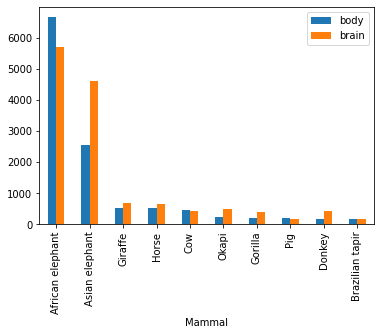

In [11]:
mammals_top = mammals.sort_values(by=['body','brain'], ascending=False).head(10)
mammals_top.plot.bar('Mammal', ['body','brain'])

### Plot the Data

Often the best way to get a sense of your data is to do so visually. Because you have to numerical features, a scatter plot would be most appropriate for this dataset. Pandas DataFrames have [two](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) [methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) that can be used to create scatter plots.

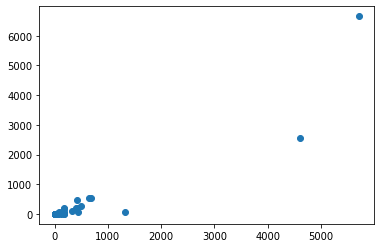

In [12]:
# Write the code to create a scatterplot with the brain and body features
plt.scatter(x=mammals['brain'], y=mammals['body'])
plt.show();

Don't worry: your scatter plot should be hard to read. Most of the values are clustered at the tiny end with two very large mammals in particular (the Asian and African elephants) skewing the scale.

### Transform Your Data

Because of the decidedly non-linear dispersion of mammalian size, you will need to transform you data in order to more clearly see the relationships in it.

**Discuss in your Breakout Room**

 - Which feature in the dataset should you transform? Should you transform both? In either case, why? What do you predict you might see after the transformation?

Answer:
both body and brain features
 
 - What transformation do you think you should use? What key words do you see in the documentation for the Pandas plot method that might give a hint? Think about the box-cox issue yesterday. What other "normalization/transformation did we discuss?


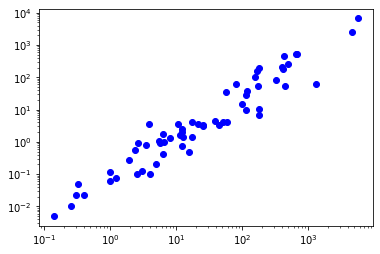

In [13]:
# Add ' loglog=True ' to the scatterplot you created above.
fig = plt.figure()
ax = plt.gca()
ax.plot(mammals['brain'], mammals['body'], 'o',c='blue')
ax.set_yscale('log')
ax.set_xscale('log')

### Fit and Plot a Linear Regression on Your Data

Transformed, the data presents an elegant linear relationship; just looking at the scatterplot, the line practically draws itself. But how tight is that linear relationship? Put another way, how far away from the line of best fit are the points of your dataset on average from the line of best fit? Fit and plot a simple linear regression model for the data to find out. If you are unsure about how to do this, refer to the Reactors module on Machine Learning Models for a reminder. You will need to perform the following steps to do fit the model:

1. Split your dataset into predictor variable (`X` is a common name of this variable) and the respons variable (`y` is a common variable name for this). (Remember to transform your data at this stage in the same way that you transformed it when you plotted it.)
2. Further divide your into training and test subsets. (There is a Scikit-learn function for this.)
3. Create the linear regression model object.
4. Fit the model to the training data.

**Note:** You will get an error when you try to fit the data. Refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html and to https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html for documenation on how to reshape the your data.

In [14]:
# You will need to reshape and transform your data in order to fit your model.
X = np.log(mammals['body']).to_numpy().reshape(-1,1)
y = np.log(mammals['brain'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now plot your model with your data. Run [`matplotlib.pyplot.plot`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) along with your transformed scatter plot of the data to do so. (Using a different color for the model will help you see it more clearly.)


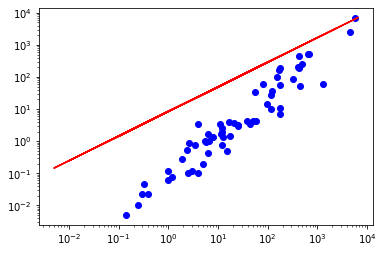

In [17]:
# Remember to account for the transformation of your data when you plot your model.
# if you get stuck go--> https://github.com/daniel-dc-cd/data_science/blob/master/daily_materials/helper/hint.md
# I've also included a picture of the output.
fig = plt.figure()
ax = plt.gca()
ax.plot(mammals['brain'], mammals['body'], 'o',c='b')
ax.set_yscale('log')
ax.set_xscale('log')
plt.plot(np.exp(X), np.exp(reg.predict(X)), c='r')

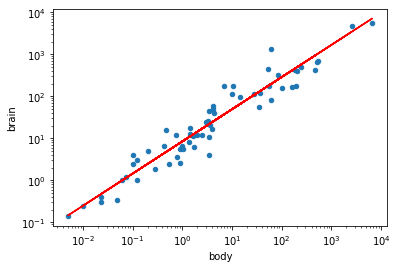

In [16]:
mammals.plot.scatter(x='body', y='brain', logx=True, logy=True);
plt.plot(np.exp(X), np.exp(reg.predict(X)), color='red');

In [19]:
from IPython.display import Image
Image("img/plot1.png")


**Discuss this in your breakout room**

 - Does your model plot as you expected it to? Does your linear model show up as a line? Remember that are modeling log-transformed data; what complementary transformations do you need to run on it to produce the linear plot you expect?
  
**Note:** Python has functions that can perform the necessary transformations and the dataset is small enough that you will likely not notice a lag in performance by using the native Python functions. That said, it is a good habit to develop to use the NumPy ufuncs for when you deal with larger datasets. For a reminder on these, refer to the Reactors moduls on NumPy.

If your transformations were successful, you should see a gratifyingly tight line with your points of data closely clustered about it. But looks can be subjective. How good is relation in reality? Us the [$R^2$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) to find out.

In [18]:
# hint: r2_score(*_****, ***.*******(*_****))
# Fill in the *s
r2_score(y_test, reg.predict(X_test))

0.8757444044097347

## Section 2: Intermediate Exploration

As your investigation showed, there is a profound relationship between the size of mammals and the size of their brains: your $R^2$ score indicates that almost 88% of the proportional, average weight of a mammal's brain can be explained by its body weight alone. (The task of evolutionary biologists is to then examine what accounts for the other 12% of the variance.) A good model, to be sure, but in practice, how good is 'good'? Plot the linear model against the untransformed data to see this more clearly.

To create this plot, you will again use the Pandas `plot` (or `plot.scatter`) method in conjunction with `matplotlib.pyplot.plot`. However, you will need to create Numpy array to supply inputs along the x-axis for `matplotlib.pyplot.plot`. (See the Reactors Numpy module for a refresher on how to do that.) You will also need to transform that array when you input it to you model and further transform the output of your model to plot it accurately.

**Discuss in your breakout room**

 - What errors are you getting? Do you need to reshape any of the data? Are zero values causing trouble for any of your transformations? How should you best deal with those?
    

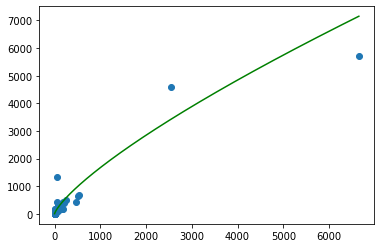

In [19]:
# Remember in plotting this that your model was fitted using transformed data.
# Need a hint? Refer back to the hint file. But don't check it for at least 10mins of struggling with this.
plt.scatter(x=mammals['body'], y=mammals['brain']) 
x = np.arange(1, max(mammals['body']))
plt.plot(x, np.exp(reg.predict(np.log(x).reshape(-1,1))), c='g')

In [20]:
# from IPython.display import Image
# Image("img/plot2.png")

Even with a good model, the noise inherent in real data can means that experimental values still diverge from your predicted ones by more than 20% in some cases. For this reason, it can be valuable to remember the maxim of statistician George Box that "[all models are wrong, but some are useful](https://en.wikipedia.org/wiki/All_models_are_wrong)."

**Note:** Another way to approach this challenge is to deal with the model coefficient and intercept directly. Recall that linear models take the form of `Y`$ = $`intercept`$ + $`coefficient`$ * $`x`. Check the documentation for your model object to see how to access those values in your model.

In [21]:
print(reg.intercept_, reg.coef_)
# Uncomment the code above and fill in the *s

2.12893055330856 [0.76632949]


### When Linear Regression is Less Helpful

As you develop your data-science skills, it is natural to want to apply the new tools that you learn to use on a variety of problems. Thus when learning about new algorithms, it can sometimes be as valuable to learn about when not to apply them as when to use them.

For example, consider a case where linear regression might not provide the insight that you would like. To investigate this, import and plot the `lynx.csv` dataset, which contains annual numbers of lynx trappings for 1821–1934 in the Mackenzie River area of Canada. (Source: Campbell, M. J. and Walker, A. M. (1977). A Survey of statistical work on the Mackenzie River series of annual Canadian lynx trappings for the years 1821–1934 and a new analysis. *Journal of the Royal Statistical Society series A, 140*, 411–431. doi: [10.2307/2345277](http://doi.org/10.2307/2345277).)

In [22]:
# Note: The plot of this data should produce a cyclical pattern.
filepath = 'https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/daily_materials/genomics_regression/Data/lynx.csv'
lynx = pd.read_csv(filepath)


In [23]:
lynx.head()

,Year,Lynx
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


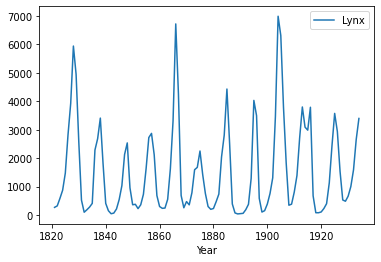

In [24]:
lynx.plot(x='Year', y='Lynx');

In [25]:
# from IPython.display import Image
# Image("img/plot3.png")

Your plot should show and interesting cyclical pattern to the data. A high peak in lynx numbers is followed by three smaller peaks every 9-10 years and then the pattern repeats itself. Ample food supply enables Mackenzie River lynx to reproduce to high numbers, after which the population plummets due to lack of food. The food supply gradually builds back up, enabling a repeat of the boom-and-bust population growth of the lynx.

**Discuss in your breakout room**

 - Is a linear model appropriate for data like this? Why or why not? What do you suspect you might see if you attempt to fit a linear model to this data?
    

Go ahead and fit and plot this data as you did for the mammals dataset above.

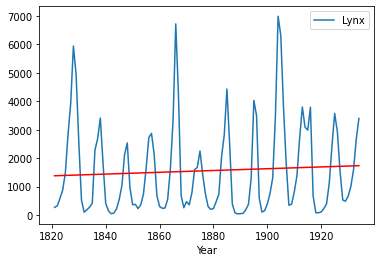

In [26]:
# Remember to reshape your data in order to fit the regression model.
X = lynx['Year'].to_numpy().reshape(-1,1)
y = lynx['Lynx']

# using a test size of 0.3 finish the code below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train,y_train)
lynx.plot(x="Year", y="Lynx")
plt.plot(X, lr.predict(X), color='red');

In [27]:
# from IPython.display import Image
# Image("img/plot4.png")

Now check the $R^2$ score for this model.

In [28]:
# Use your code again from above.
r2_score(y_test, reg.predict(X_test))

0.0013169188585102631

**Discuss in your breakout room**

 - What does this $R^2$ score mean? What interpretation might it carry? (This [essay](https://web.maths.unsw.edu.au/~adelle/Garvan/Assays/GoodnessOfFit.html) from the University of New South Wales might help your discussion.)

 - Even if your $R^2$ score cannot explain the proportion of variance explained by your model, what information might it nonetheless provide?


### Classification

Some practitioners say that 70% of problems in data science involve classificaiton. This figure is probably higher still in life sciences. In order to explore ML-based classification, let's return to a dataset you already encountered in the Reactors Manipulating and Cleaning Data module. Import the Python scikit-learn library and use an iconic dataset that every data scientist has seen hundreds of times: British biologist Ronald Fisher's *Iris* data set used in his 1936 paper "The use of multiple measurements in taxonomic problems."

You have already imported the Scikit-learn library containing the `iris` dataset; you can access it using the `load_iris()` function. (Look at the `?load_iris` documentation for more information about this function; the data and target information is stored separately.) You might also find it helpful to create a DataFrame with the iris information in order to investigate it. (Check the Reactors Pandas module for a refresher on how to load data into DataFrames.)

In [29]:
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [30]:
# Look around a bit and become re-aquainted with the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


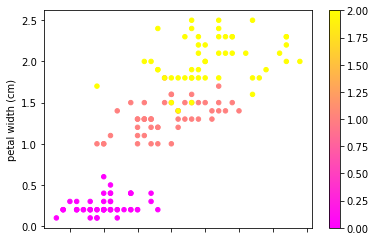

In [32]:
iris_df.plot(kind = 'scatter', x= 'sepal length (cm)', y='petal width (cm)', c=y, cmap=("spring"))	

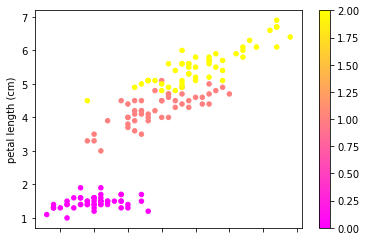

In [33]:
iris_df.plot(kind = 'scatter', x= 'sepal length (cm)', y='petal length (cm)', c=y, cmap=("spring"))	

Yesterday and earlier, you used the logistic regression and decision tree algorithms to classify observations into two categories, let's dig deeper into k-Means!

#### $K$-means Clustering

$K$-means clustering is an example of unsupervised machine learning. Rather than having to train a model, the $k$-means algorithm examines all of the data to make a determination of which category to assign a particular observation. All that you have to do is supply the algorithm with the number of categories into which you want observations classified.

Based on the number of species in the `iris` dataset, what is the most appropriate number of clusters to submit to the algorithm? Fit a $k$-means model for that number of clusters and measure its accuracy. [(Consult the ?metrics.accuracy_score documentation for information on how to do this.)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [34]:
kmeans = KMeans(n_clusters=3, random_state= 2) # , random_state= 2- 1 - 0 - 42
kmeans = kmeans.fit(X)
y_pred = kmeans.predict(X)

# Use y and y_pred as parameters to get accuracy score below
metrics.accuracy_score(y, y_pred)

0.24

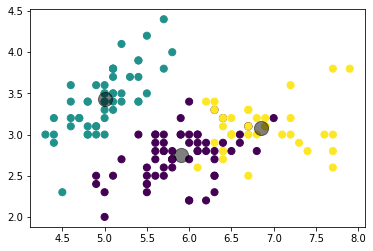

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Discuss in your breakout room**

 - Is this accuracy surprising? Try different values for the `random_state` parameter in the `KMeans` function (such as 0, 1, 2). Why the large disparities in accuracy based on the random state of the algorithm? (In the Individual Exploration section below, you can explore some of the structure of the `iris` dataset that can help generate these disparities.)


#### $K$-nearest Neighbors

A classification algorithm that might work better on the `iris` dataset is the $k$-nearest neighbors algorithm (abbreviated $k$-NN). It works by comparing an observation to its $k$ nearest training observations in feature space (where $k$ is a parameter supplied by the user). $k$-NN is a supervised algorithm, so it does need to be supplied with a *response*--the correct classifications that you are looking for (often referred to as $y$)--in order to classify new observations. Fit a $k$-NN model and use `metrics.accuracy_score` to examine its accuracy.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

**Discuss in your breakout room**

Yesterday there was a question about the `random_state` parameter. Let's play with it a bit to understand what a seed value is and how it works.

 - Try supplying different `random_state` parameters to the `train_test_split` function (such as `random_state=0` and `random_state=2`). What causes the differences in accuracy?


One way to mitigate the luck of the draw inherent in training/test splitting is to do so repeatedly. 

We saw yesterday that iterating through your dataset and grabbing folds of test data can give you better quality results. Testing your models in this way is called cross validation (or $k$-fold cross validation after the number of times you resplit the data, the folds). Scikit-learn has a [good page](https://scikit-learn.org/stable/modules/cross_validation.html) in its documentation on the concept.

Use the `cross_val_score` model to perform a 10-fold cross validation on your $k$-NN model and take the mean of the accuracy scores. What to you think the value will be?

In [37]:
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores.mean()

0.9666666666666668

## Section 3: Exploration of classification and predictive ML algorithms:

- What number of nearest neighbors provides the highest average accuracy for your $k$-NN model? 

- While it's true that with the $k$-NN algorithm you don't have to worry about feature engineering or selection, the selection of $k$ can play a big role in the algorithm's accuracy for you dataset and must be tuned. The better that you can tune your algorithm for accuracy, the better you can help domain experts solve problems, be they correctly identifying irises (in this example) or sequencing genes in bioinformatics or correctly identifying diseased cells in a medical application.


In [38]:
k_range = list(range(1, 26))
k_dict = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_dict[k] = scores.mean()
score_max = max(k_dict, key=k_dict.get) 
print(score_max, k_dict[score_max])

13 0.9800000000000001


 - Visualize the `iris` dataset to see why the $k$-means algorithm produced the accuracy that it did.
 
 The `iris` dataset has four features, which means that a true scatter plot of all of the observations in it would require four dimensions, which is impossible to visualize directly. However, you can use a technique called principle component analysis (PCA) to reduce this to three dimensions with minimal loss of information. (Also, I found this resource for you to better understand PCA: https://setosa.io/ev/principal-component-analysis/)
 
 To visualized a "flattened" `iris` dataset, you will need to fit a PCA transformation with the data from the dataset. You can get some ideas about what code to use from this [page](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) from the Scikit-learn documentation.
 

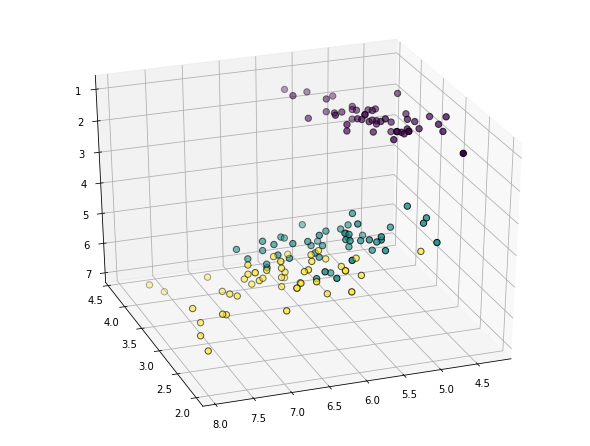

In [40]:
# The plot below isn't using the reduced data, modify the code below to use the data we transformed with PCA
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k', s=40)

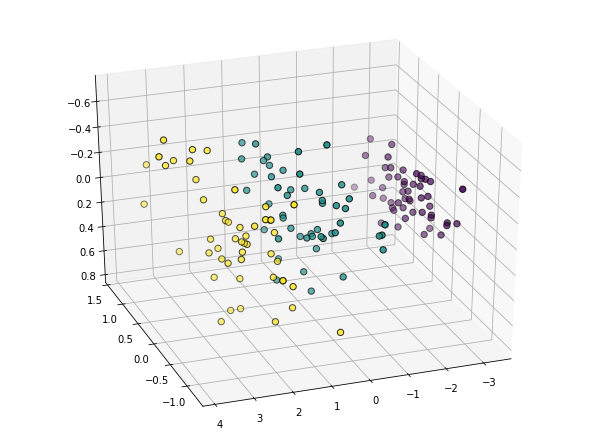

In [41]:
# Perform the PCA dimension-reduction on the iris data.
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# The plot below isn't using the reduced data, modify the code below to use the data we transformed with PCA
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap='viridis', edgecolor='k', s=40)

With this visualization in hand, why might $k$-means clustering not be a good classification algorithm to use with the `iris` dataset? (This [Wikipedia article](https://en.wikipedia.org/wiki/K-means_clustering) on $k$-means clustering might help your discussion.)
 - *In this lower-dimensional projection of the data, the three types of iris appear in parallel bands, which also play a role with the $k$-means algorithm being able to cleanly draw boundaries between them in higher dimensions.*